In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scikits import bvp_solver
import seaborn
%matplotlib inline

### Problem 1

In [2]:
def sir_ode1(y,x): 
    beta, gamma = .5, .25
    S,I,R = y[0], y[1], y[2]
    return np.array([-beta*S*I, beta*S*I - gamma*I, gamma*I])

X = np.linspace(0,100,100)
y0 = np.array([1 - 6.25*10**-7, 6.25*10**-7, 0])
sol = odeint(sir_ode1, y0, X)
plt.plot(X, sol[:,0],label="Susceptible")
plt.plot(X, sol[:,1],label="Infected")
plt.plot(X, sol[:,2],label="Recovered")
plt.legend(loc="lower left", bbox_to_anchor=(1,0))
plt.show()

### Problem 2

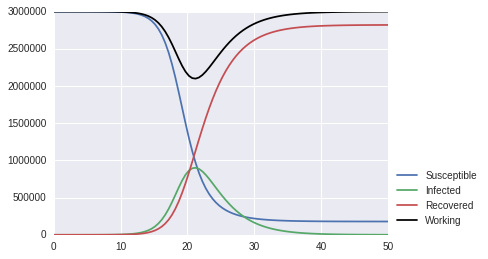

In [3]:
def sir_ode2a(y,x): 
    beta, gamma = 1, 1/3.
    S,I,R = y[0], y[1], y[2]
    return np.array([-beta*S*I, beta*S*I - gamma*I, gamma*I])

X = np.linspace(0,50,100)
y0 = np.array([(1 - 5./3e6), 5./3e6, 0])
sol = odeint(sir_ode2a, y0, X)
plt.plot(X, sol[:,0]*3e6,label="Susceptible")
plt.plot(X, sol[:,1]*3e6,label="Infected")
plt.plot(X, sol[:,2]*3e6,label="Recovered")
plt.plot(X, 3e6 - sol[:,1]*3e6,"k",label="Working")
plt.legend(loc="lower left", bbox_to_anchor=(1,0))
plt.show()

In [4]:
def sir_ode2b(y,x): 
    beta, gamma = 1, 1/7.
    S,I,R = y[0], y[1], y[2]
    return np.array([-beta*S*I, beta*S*I - gamma*I, gamma*I])

X = np.linspace(0,50,100)
y0 = np.array([(1 - 5./3e6), 5./3e6, 0])
sol2a = odeint(sir_ode2a, y0, X)
sol2b = odeint(sir_ode2b, y0, X)
print int(min(3e6 - sol2a[:,1]*3e6)), "available to work with 3-day infection"
print int(min(3e6 - sol2b[:,1]*3e6)), "available to work with 7-day infection"

2099160 available to work with 3-day infection
1264194 available to work with 7-day infection


### Problem 3

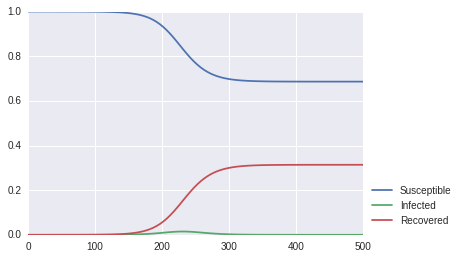

In [5]:
def sir_ode1(y,x): 
    beta, gamma = .3, .25
    S,I,R = y[0], y[1], y[2]
    return np.array([-beta*S*I, beta*S*I - gamma*I, gamma*I])

X = np.linspace(0,500,100)
y0 = np.array([1 - 6.25*10**-7, 6.25*10**-7, 0])
sol = odeint(sir_ode1, y0, X)
plt.plot(X, sol[:,0], label="Susceptible")
plt.plot(X, sol[:,1], label="Infected")
plt.plot(X, sol[:,2], label="Recovered")
plt.legend(loc="lower left", bbox_to_anchor=(1,0))
plt.show()

### Problem 4

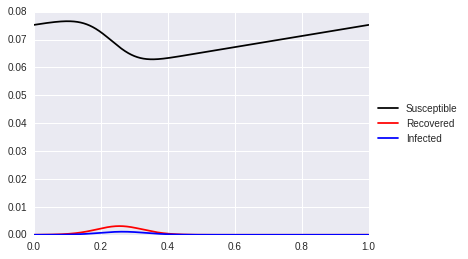

In [7]:
def prob4():
    mu, beta0, beta1, gamma, eta = .02,1575.,1.,.0279 ,.01
    beta = lambda t: beta0*(1+beta1*np.cos(2*np.pi*t))

    def ode(x , y):
        s,e,i = y[0],y[1],y[2]
        return np.array([mu-beta(x)*s*i,beta(x)*s*i-e/gamma,e/gamma-i/eta,0,0,0])

    def bcs(ya, yb):
        BCa = np.array(ya[:3] - ya[3:]) # 1 Boundary condition on the left, I want to be at lbc, I got ya[0], how far off am i?
        BCb = np.array(yb[:3] - ya[3:]) # 1 Boundary condition on the right
        return BCa, BCb

    problem = bvp_solver.ProblemDefinition(num_ODE=6, num_parameters=0, num_left_boundary_conditions=3, boundary_points=(0, 1), function=ode, boundary_conditions=bcs)
    solution = bvp_solver.solve(problem, solution_guess=(.8, .1, .1, .8, .1, .1))

    A = np.linspace(0., 1., 1000)
    T = solution(A)
    plt.plot(A, T[0,:],'-k', label='Susceptible')
    plt.plot(A, T[1,:],'-r', label='Recovered')
    plt.plot(A, T[2,:],'-b', label='Infected')
    plt.legend(loc='center left',bbox_to_anchor=(1,.5))
    plt.show()
    
prob4()